In [ ]:
!pip install geopandas
!pip install mapclassify
!pip install pygeos

In [ ]:
%cd /content/drive/MyDrive/11279group34/
!pwd

/content/drive/MyDrive/11279group34
/content/drive/MyDrive/11279group34


In [ ]:
!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

Found existing installation: Rtree 0.9.7
Uninstalling Rtree-0.9.7:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Rtree-0.9.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Rtree.libs/libspatialindex-bf66e7c6.so.6.1.1
    /usr/local/lib/python3.7/dist-packages/rtree/*
Proceed (y/n)? ERROR: Operation cancelled by user
^C
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
import geopandas
import pandas as pd
import rtree
import pygeos
import matplotlib.pyplot as plt
import folium
import numpy as np

Reading in layer data

In [ ]:
watershed = geopandas.read_file('data/mitigationBank/Mitigation_Bank_Watersheds.geojson')
watershed

,OBJECTID,NAME,WMD,WMD_NUMBER,SHAPEAREA,SHAPELEN,geometry
0,1,St. Andrew Bay,NWFWMD,NaN,3.028729e+09,1.331015e+06,"MULTIPOLYGON (((-85.42021 30.63760, -85.42036 ..."
1,2,Apalachicola River,NWFWMD,NaN,7.381062e+09,1.224587e+06,"MULTIPOLYGON (((-85.00258 30.99980, -85.00251 ..."
2,3,Pensacola Bay System,NWFWMD,NaN,6.066121e+09,1.152938e+06,"MULTIPOLYGON (((-87.43928 30.32521, -87.44026 ..."
3,4,Perdido River,NWFWMD,NaN,8.909091e+08,4.063185e+05,"MULTIPOLYGON (((-87.41064 30.33713, -87.41039 ..."
4,5,Ochlockonee River,NWFWMD,NaN,3.367390e+09,5.492098e+05,"MULTIPOLYGON (((-84.44339 30.69181, -84.45405 ..."
...,...,...,...,...,...,...,...
75,76,Southern Ocklawaha River,SJRWMD,12.0,2.449076e+09,5.699159e+05,"MULTIPOLYGON (((-82.00610 29.29268, -82.00664 ..."
76,77,Tidal Caloosahatchee,SFWMD,24.0,1.421441e+09,2.370847e+05,"POLYGON ((-81.76067 26.93209, -81.76102 26.931..."
77,78,Ocoee Drain,SJRWMD,14.0,4.132842e+07,3.604105e+04,"POLYGON ((-81.51853 28.57419, -81.51879 28.574..."
78,79,St. Johns River (Wekiva To Welaka),SJRWMD,14.0,2.115021e+09,3.565250e+05,"POLYGON ((-81.61111 29.49975, -81.61193 29.500..."


In [ ]:
centroids = geopandas.read_file('centroidPoints.geojson')

KeyboardInterrupt: ignored

In [ ]:
centroids

,OBJECTID,geometry
0,1,POINT (-8949496.651 3176698.682)
1,2,POINT (-8949106.299 3177249.232)
2,3,POINT (-8953091.749 3177318.692)
3,4,POINT (-8947966.907 3177347.275)
4,5,POINT (-8949616.034 3177551.032)
...,...,...
1338031,1338032,POINT (-9130491.112 3575723.293)
1338032,1338033,POINT (-9095303.402 3575202.887)
1338033,1338034,POINT (-9106407.185 3574920.918)
1338034,1338035,POINT (-9099131.919 3575314.852)


In [ ]:
#parcels = geopandas.read_file('REDUCEDlanduseLDI_centroids_nearestID_dist.geojson')
parcels = geopandas.read_file('landuseLDI_centroids_nearestID_dist.geojson')

In [ ]:
# Create new row for LSI * nearest water dist
parcels['LSIxWATERDISTANCE'] = parcels.apply(lambda row: row.LSI * row.dist, axis=1)
parcels

,OBJECTID,LEVEL3_VALUE,LDI,LSI,WMD_DISTRICT,LANDUSE_YEAR,DESCRIPTION,SHAPEAREA,SHAPELEN,nearestID,dist,geometry,LSIxWATERDISTANCE
0,1,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",202486.422768,2768.478185,1013765.0,615.418975,"POLYGON ((-80.39430 27.58675, -80.39430 27.586...",2215.508311
1,2,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",4144.953037,287.746301,597436.0,327.743115,"POLYGON ((-80.39067 27.58704, -80.39066 27.587...",1179.875216
2,3,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",9408.253317,471.548879,646647.0,370.776985,"POLYGON ((-80.42704 27.58723, -80.42662 27.587...",1334.797145
3,4,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",14729.055061,639.330146,1258032.0,117.512084,"POLYGON ((-80.37991 27.58839, -80.37987 27.588...",423.043503
4,5,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",81255.766776,1202.345663,1019526.0,481.386216,"POLYGON ((-80.39454 27.58873, -80.39374 27.588...",1732.990377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338031,1338032,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,8436.737078,471.816539,0.0,0.000000,"POLYGON ((-82.02071 30.72787, -82.02065 30.727...",0.000000
1338032,1338033,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,4395.450443,246.783645,0.0,0.000000,"POLYGON ((-81.70438 30.72415, -81.70432 30.724...",0.000000
1338033,1338034,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,303663.108819,6475.501932,0.0,0.000000,"POLYGON ((-81.81171 30.72584, -81.81178 30.726...",0.000000
1338034,1338035,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,3600.924167,238.813225,0.0,0.000000,"POLYGON ((-81.73858 30.72505, -81.73852 30.725...",0.000000


## Try and get only things within Northern Ocklawaha River

In [ ]:
centroids.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
watershed.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
targetWatershed = watershed.loc[watershed['NAME'] == 'Northern Ocklawaha River'].to_crs(epsg=3395)
watershed

,OBJECTID,NAME,WMD,WMD_NUMBER,SHAPEAREA,SHAPELEN,geometry
0,1,St. Andrew Bay,NWFWMD,NaN,3.028729e+09,1.331015e+06,"MULTIPOLYGON (((-85.42021 30.63760, -85.42036 ..."
1,2,Apalachicola River,NWFWMD,NaN,7.381062e+09,1.224587e+06,"MULTIPOLYGON (((-85.00258 30.99980, -85.00251 ..."
2,3,Pensacola Bay System,NWFWMD,NaN,6.066121e+09,1.152938e+06,"MULTIPOLYGON (((-87.43928 30.32521, -87.44026 ..."
3,4,Perdido River,NWFWMD,NaN,8.909091e+08,4.063185e+05,"MULTIPOLYGON (((-87.41064 30.33713, -87.41039 ..."
4,5,Ochlockonee River,NWFWMD,NaN,3.367390e+09,5.492098e+05,"MULTIPOLYGON (((-84.44339 30.69181, -84.45405 ..."
...,...,...,...,...,...,...,...
75,76,Southern Ocklawaha River,SJRWMD,12.0,2.449076e+09,5.699159e+05,"MULTIPOLYGON (((-82.00610 29.29268, -82.00664 ..."
76,77,Tidal Caloosahatchee,SFWMD,24.0,1.421441e+09,2.370847e+05,"POLYGON ((-81.76067 26.93209, -81.76102 26.931..."
77,78,Ocoee Drain,SJRWMD,14.0,4.132842e+07,3.604105e+04,"POLYGON ((-81.51853 28.57419, -81.51879 28.574..."
78,79,St. Johns River (Wekiva To Welaka),SJRWMD,14.0,2.115021e+09,3.565250e+05,"POLYGON ((-81.61111 29.49975, -81.61193 29.500..."


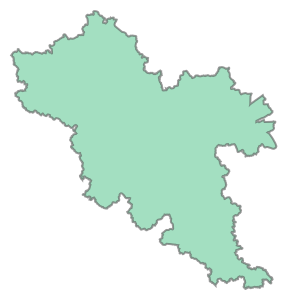

In [ ]:
targetWatershedGeo = targetWatershed.iloc[0]['geometry']
targetWatershedGeo

In [ ]:
from tqdm.auto import tqdm

within = []
for i, row in tqdm(centroids.iterrows(), total=centroids.shape[0]):
  if row.geometry.within(targetWatershedGeo):
    within.append(row)
within

In [ ]:
# Convert list of series into list of objects
withinGeos = []
withinIDS = []
for series in within:
  withinIDS.append(series.values[0])
  withinGeos.append(series.values[1])

In [ ]:
pointsWithinArea = geopandas.GeoDataFrame(data=withinIDS, geometry=withinGeos, crs='EPSG:4326')
pointsWithinArea = pointsWithinArea.rename(columns={0: 'id'})

In [ ]:
parcelsWithin = geopandas.read_file('parcelsInNorthern_Ocklawaha.geojson')
parcelsWithin = parcelsWithin.drop(['WMD_DISTRICT', 'LANDUSE_YEAR', 'SHAPELEN', 'LSIxWATERDISTANCE'], axis=1)
parcelsWithin

,OBJECTID,LEVEL3_VALUE,LDI,LSI,DESCRIPTION,SHAPEAREA,nearestID,dist,geometry
0,3887,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",16702.649369,1020954.0,1610.024050,"POLYGON ((-82.10706 29.35486, -82.10730 29.354..."
1,3888,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",10106.760010,1034050.0,1699.450972,"POLYGON ((-82.10458 29.35312, -82.10459 29.353..."
2,3889,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",23936.882815,1031833.0,566.492566,"POLYGON ((-82.04351 29.35420, -82.04577 29.354..."
3,3891,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",92837.668643,1266184.0,594.422107,"POLYGON ((-82.08308 29.35597, -82.08377 29.355..."
4,3894,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",24120.510718,654122.0,459.598319,"POLYGON ((-82.17741 29.35778, -82.17737 29.357..."
...,...,...,...,...,...,...,...,...,...
24616,1333346,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,4198.210768,0.0,0.000000,"POLYGON ((-82.25093 29.78103, -82.25071 29.781..."
24617,1333366,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,9636.948251,0.0,0.000000,"POLYGON ((-82.24662 29.79466, -82.24662 29.794..."
24618,1333398,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,6178.004894,0.0,0.000000,"POLYGON ((-82.21580 29.81202, -82.21593 29.812..."
24619,1334354,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,5315.706272,0.0,0.000000,"POLYGON ((-82.24669 29.79760, -82.24662 29.797..."


In [ ]:
x = 10 in parcelsWithin['OBJECTID']
x

True

In [ ]:
parcelsWithin.loc[parcelsWithin['OBJECTID'] == 3]

,OBJECTID,LEVEL3_VALUE,LDI,LSI,DESCRIPTION,SHAPEAREA,nearestID,dist,geometry,WATERDISTANCE/LDI,normalized


In [ ]:
# Get unique lvl 3 values
parcelsWithin.drop_duplicates('LEVEL3_VALUE').drop(['OBJECTID', 'SHAPEAREA', 'nearestID', 'dist', 'geometry', 'WATERDISTANCE/LDI', 'normalized'], axis=1).to_html('uniques.html')

In [ ]:
uniques = parcelsWithin.drop_duplicates('LEVEL3_VALUE').drop(['OBJECTID', 'SHAPEAREA', 'nearestID', 'dist', 'geometry', 'WATERDISTANCE/LDI', 'normalized'], axis=1)
uniques.set_index('LEVEL3_VALUE', inplace=True)
uniques

,LDI,LSI,DESCRIPTION
LEVEL3_VALUE,,,
1100.0,6.8,3.6,"1100: Low Density, <2 dwelling units/acre"
8370.0,8.3,1.9,8370: Surface Water Collection Features
1110.0,6.8,3.6,"1110: Low Density, Fixed Single Family Units"
1120.0,6.8,3.6,"1120: Low Density, Mobile Home Units"
1130.0,6.8,3.6,"1130: Low Density, Mixed Units (Fixed and Mobi..."
...,...,...,...
8160.0,8.3,1.9,8160: Canals and Locks
8320.0,1.9,9.1,8320: Electrical Power Transmission Lines
8340.0,8.3,1.9,8340: Sewage Treatment


In [ ]:
 [1490] + uniques.loc[1490].values.tolist()

[1490, 8.0, 2.2, '1490: Commercial and Services Under Construction']

In [ ]:
parcelsWithin.loc[parcelsWithin['OBJECTID'] == 3889, ['LEVEL3_VALUE', 'LDI', 'LSI', 'DESCRIPTION']] = [8370] + uniques.loc[8370].values.tolist()
parcelsWithin

,OBJECTID,LEVEL3_VALUE,LDI,LSI,DESCRIPTION,SHAPEAREA,nearestID,dist,geometry,WATERDISTANCE/LDI,normalized
0,3887,1100.0,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",16702.649369,1020954.0,1610.024050,"POLYGON ((-82.10706 29.35486, -82.10730 29.354...",447.228903,6.103071
1,3888,1100.0,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",10106.760010,1034050.0,1699.450972,"POLYGON ((-82.10458 29.35312, -82.10459 29.353...",472.069715,6.157127
2,3889,8370.0,8.3,1.9,8370: Surface Water Collection Features,23936.882815,1031833.0,566.492566,"POLYGON ((-82.04351 29.35420, -82.04577 29.354...",157.359046,5.058530
3,3891,1100.0,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",92837.668643,1266184.0,594.422107,"POLYGON ((-82.08308 29.35597, -82.08377 29.355...",165.117252,5.106656
4,3894,1100.0,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",24120.510718,654122.0,459.598319,"POLYGON ((-82.17741 29.35778, -82.17737 29.357...",127.666200,4.849419
...,...,...,...,...,...,...,...,...,...,...,...
24568,1321789,8370.0,8.3,1.9,8370: Surface Water Collection Features,3849.172420,869943.0,254.540918,"POLYGON ((-82.38585 29.71025, -82.38593 29.710...",133.968904,4.897608
24569,1321790,8370.0,8.3,1.9,8370: Surface Water Collection Features,3980.528650,1322542.0,721.659567,"POLYGON ((-82.42739 29.71112, -82.42738 29.711...",379.820825,5.939700
24570,1321791,8370.0,8.3,1.9,8370: Surface Water Collection Features,3024.136577,869943.0,399.264297,"POLYGON ((-82.38817 29.71008, -82.38815 29.710...",210.139104,5.347770
24571,1321792,8370.0,8.3,1.9,8370: Surface Water Collection Features,7235.060225,652983.0,373.841672,"POLYGON ((-82.35562 29.71042, -82.35562 29.710...",196.758774,5.281978


In [ ]:
parcelsWithin.normalized.sum()

48738.00527781375

In [ ]:
def function(dist, LSI):
  if LSI != 0:
    return dist / LSI
  else:
    return 0

parcelsWithin['WATERDISTANCE/LDI'] = parcelsWithin.apply(lambda row: function(row.dist, row.LSI), axis=1)
parcelsWithin

,OBJECTID,LEVEL3_VALUE,LDI,LSI,DESCRIPTION,SHAPEAREA,nearestID,dist,geometry,WATERDISTANCE/LDI
0,3887,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",16702.649369,1020954.0,1610.024050,"POLYGON ((-82.10706 29.35486, -82.10730 29.354...",447.228903
1,3888,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",10106.760010,1034050.0,1699.450972,"POLYGON ((-82.10458 29.35312, -82.10459 29.353...",472.069715
2,3889,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",23936.882815,1031833.0,566.492566,"POLYGON ((-82.04351 29.35420, -82.04577 29.354...",157.359046
3,3891,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",92837.668643,1266184.0,594.422107,"POLYGON ((-82.08308 29.35597, -82.08377 29.355...",165.117252
4,3894,1100,6.8,3.6,"1100: Low Density, <2 dwelling units/acre",24120.510718,654122.0,459.598319,"POLYGON ((-82.17741 29.35778, -82.17737 29.357...",127.666200
...,...,...,...,...,...,...,...,...,...,...
24616,1333346,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,4198.210768,0.0,0.000000,"POLYGON ((-82.25093 29.78103, -82.25071 29.781...",0.000000
24617,1333366,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,9636.948251,0.0,0.000000,"POLYGON ((-82.24662 29.79466, -82.24662 29.794...",0.000000
24618,1333398,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,6178.004894,0.0,0.000000,"POLYGON ((-82.21580 29.81202, -82.21593 29.812...",0.000000
24619,1334354,6460,1.0,10.0,6460: Mixed Scrub-shrub Wetland,5315.706272,0.0,0.000000,"POLYGON ((-82.24669 29.79760, -82.24662 29.797...",0.000000


W/ layers

In [ ]:
waterParcels = parcelsWithin.loc[parcelsWithin['dist'] == 0]

In [ ]:
parcelsWithin.drop(waterParcels.index, inplace=True)

KeyError: ignored

In [ ]:
parcelsWithin.drop(parcelsWithin.loc[parcelsWithin['WATERDISTANCE/LDI'] == 0].index, inplace=True)
parcelsWithin.drop(parcelsWithin.loc[parcelsWithin['WATERDISTANCE/LDI'] > 750].index, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4f7b3610>]],
      dtype=object)

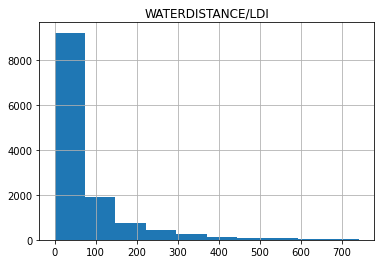

In [ ]:
parcelsWithin.hist(column='WATERDISTANCE/LDI')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c4f7ea550>]],
      dtype=object)

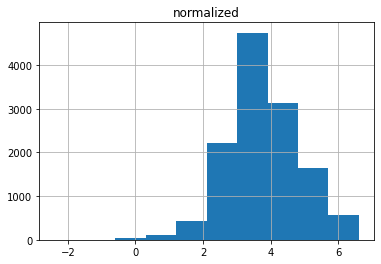

In [ ]:
parcelsWithin['normalized'] = np.log(parcelsWithin['WATERDISTANCE/LDI'])
parcelsWithin.hist(column='normalized')

In [ ]:
map = folium.Map(location=[29.648, -82.343], zoom_start=12, tiles='CartoDB positron')
map

In [ ]:
foliumParcels = folium.features.GeoJson(parcelsWithin, 
                                        name="Parcels",
                                        tooltip=folium.features.GeoJsonTooltip(
                                            fields=['DESCRIPTION', 'OBJECTID'],
                                            aliases = ['Description', 'Parcel ID'],
                                            labels=True,
                                            sticky=False
                                                                            )
                                        )
map.add_child(foliumParcels)

In [ ]:
folium.Choropleth(
    geo_data=foliumParcels,
    data=foliumParcels,
    columns=["OBJECTID", "WATERDISTANCE/LDI"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Development Impact",
).add_to(map)

TypeError: ignored

In [ ]:
folium.LayerControl().add_to(map)
map.save('mapFolium.html')

Display map with layers?

In [ ]:
m = folium.Map(location=[27.70, -82.94], zoom_start=7, tiles='CartoDB positron')
m

In [ ]:
folium_watersheds = folium.features.GeoJson(watershed, name="Watersheds")

In [ ]:
file = open("REDUCEDx2landuseLDI_centroids_nearestID_dist.geojson")

In [ ]:
folium_parcels = folium.features.GeoJson(file.read(), name="Parcels")

In [ ]:
m.add_child(folium_watersheds)

In [ ]:
m.add_child(folium_parcels)

In [ ]:
folium.LayerControl().add_to(m)
m

In [ ]:
m.save('map2.html')

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


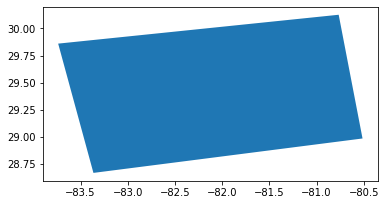

In [ ]:
from shapely.geometry import Polygon

coord1 = [-83.7377930, -83.3642578, -80.5133057, -80.7659912, -83.7377930]
coord2 = [29.8597014, 28.6664912, 28.9841173, 30.1261244, 29.8597014]
polygon_geom = Polygon(zip(coord1, coord2))
crs = {'init': 'epsg:4326'}
polygon = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
polygon.plot()

In [ ]:
polygon.to_crs(epsg=4326)

,geometry
0,"POLYGON ((-83.73779 29.85970, -83.36426 28.666..."


In [ ]:
concat = pd.concat([polygon]*166937 )

In [ ]:
truths = concat.contains(parcels)

/usr/local/lib/python3.7/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [ ]:
truths.loc[truths == True]

Series([], dtype: bool)

Getting only Northern Ocklawaha River

In [ ]:
import pandas as pd

/usr/local/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


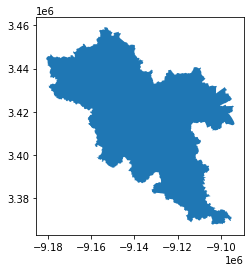

In [ ]:
desiredPoly = watershed.loc[watershed.NAME == 'Northern Ocklawaha River']
desiredPoly.to_crs(epsg='3395', inplace=True)
desiredPoly.plot()

In [ ]:
x = desiredPoly.geometry.contains(centroids)
x

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0          False
1          False
2          False
3          False
4          False
           ...  
1338031    False
1338032    False
1338033    False
1338034    False
1338035    False
Length: 1338036, dtype: bool

In [ ]:
centroids[~centroids.geometry.within(desiredPoly)]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,OBJECTID,geometry
0,1,POINT (-8949496.651 3176698.682)
1,2,POINT (-8949106.299 3177249.232)
2,3,POINT (-8953091.749 3177318.692)
3,4,POINT (-8947966.907 3177347.275)
4,5,POINT (-8949616.034 3177551.032)
...,...,...
1338031,1338032,POINT (-9130491.112 3575723.293)
1338032,1338033,POINT (-9095303.402 3575202.887)
1338033,1338034,POINT (-9106407.185 3574920.918)
1338034,1338035,POINT (-9099131.919 3575314.852)


In [ ]:
geopandas.sjoin(centroids, desiredPoly, op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


ImportError: ignored

In [ ]:
!pip install -q condacolab -q
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:52
🔁 Restarting kernel...


In [ ]:
!conda install geopandas

import geopandas as gpd

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    boost-cpp-1.74.0           |       h312852a_4        16.3 MB  conda-forg

/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# switching to just removing a bunch of parcels
import random

drops = []
for i in range(166937 ):
  if random.random() > .2:
    drops.append(i)

In [ ]:
reducedParcels = parcels.drop(drops)
reducedParcels

,OBJECTID,LEVEL3_VALUE,LDI,LSI,WMD_DISTRICT,LANDUSE_YEAR,DESCRIPTION,SHAPEAREA,SHAPELEN,nearestID,dist,LSIxWATERDISTANCE,geometry
2,32,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",68212.662921,1696.764782,647186.0,344.142686,1238.913668,"POLYGON ((-80.43123 27.63305, -80.43124 27.633..."
9,125,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",13724.248247,648.239415,770984.0,220.587506,794.115023,"POLYGON ((-80.40202 27.70937, -80.40206 27.709..."
14,148,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",30683.958587,1232.588028,1010928.0,375.287547,1351.035171,"POLYGON ((-80.46235 27.73120, -80.46235 27.731..."
15,161,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",20270.128928,793.064880,647198.0,352.858440,1270.290384,"POLYGON ((-80.87500 27.68527, -80.87463 27.685..."
17,168,1100,6.8,3.6,SJR,2013-2016,"1100: Low Density, <2 dwelling units/acre",79111.302261,2055.521211,647208.0,364.033885,1310.521987,"POLYGON ((-80.44207 27.67888, -80.44205 27.679..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166907,1337829,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,21861.331202,618.571295,0.0,0.000000,0.000000,"POLYGON ((-82.04756 30.23513, -82.04822 30.235..."
166912,1337850,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,2953.180078,227.449736,0.0,0.000000,0.000000,"POLYGON ((-81.82165 30.27571, -81.82172 30.275..."
166920,1337905,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,10084.126138,624.868924,0.0,0.000000,0.000000,"POLYGON ((-81.78584 30.44015, -81.78584 30.440..."
166922,1337919,6460,1.0,10.0,SJR,2013-2016,6460: Mixed Scrub-shrub Wetland,44163.985616,1364.042377,0.0,0.000000,0.000000,"POLYGON ((-81.96357 30.44229, -81.96342 30.442..."


In [ ]:
reducedParcels.to_file("REDUCEDx2landuseLDI_centroids_nearestID_dist.geojson", driver="GeoJSON")